# Mini project 8 : 비플페이 앱 DB 설계
- 앱 속성들을 가지고 ERD(Entity-Relationship Diagram) 그래프 생성하기

- 주요 테이블 및 관계
    - 회원관리 (User)
        - 회원은 여러 개의 비플페이를 사용할 수 있음 (1:N)
        - 회원은 여러 개의 비플식권을 사용할 수 있음 (1:N)
    - 비플페이관리 (BeplePay)
        - 여러 회원이 동일한 비플페이를 사용할 수 있으므로 M:N 관계 가능 (중개 테이블 필요)
    
    - 비플식권관리 (BepleTicket)
        - 특정 회원이 여러 비플식권을 가질 수 있음 (1:N)
        - 각 비플식권 사용 시점과 매장을 기록함

- 설계 주요 사항

    - 회원관리(User) 테이블은 user_id를 기본키(PK)로 설정
    - 비플페이관리(BeplePay) 테이블은 pay_id를 기본키(PK)로 설정
    - 비플식권관리(BepleTicket) 테이블은 ticket_id를 기본키(PK)로 설정하며, 회원과 1:N 관계를 가짐
    - User_BeplePay 중간 테이블을 생성하여 회원과 비플페이 간 N:M 관계 해결

In [5]:
! pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [7]:
from graphviz import Digraph

# ERD 다이어그램 생성
erd = Digraph('ERD', filename='beple_pay_erd_updated', format='png', encoding='utf8')

# 회원관리 테이블 (User)
erd.node('User', '''회원관리 (User)
--------------------
- user_id (PK)
- 휴대폰번호 (varchar(20))
- 통신사 (varchar(20))
- 주민등록번호 (varchar(20))
- 이름 (varchar(10))
- 등록날짜 (date)
- 핸드폰 기기 (varchar(50))
''', shape='rectangle', fontname='Sans')

# 비플페이관리 테이블 (BPay)
erd.node('BPay', '''비플페이관리 (BPay)
--------------------
- pay_id (PK)
- 페이사용 이름 (varchar(20))
- 관리회사 (varchar(20))
- 등록날짜/시간 (date)
''', shape='rectangle', fontname='Sans')

# 비플식권관리 테이블 (BPayTicket)
erd.node('BPayTicket', '''비플식권관리 (BPayTicket)
--------------------
- ticket_id (PK)
- user_id (FK)
- 월잔액한도 (int)
- 사용매장 (varchar(50))
- 사용날짜/시간 (date)
- 사용금액 (int)
- qrcode (varchar(100))
- 결제여부 (varchar(10))
''', shape='rectangle', fontname='Sans')

# 회원-비플페이 관계 (N:M)
erd.node('User_BPay', '''회원_비플페이 (User_BPay)
--------------------
- user_id (FK)
- pay_id (FK)
''', shape='rectangle', fontname='Sans')

# 관계 설정
erd.edge('User', 'User_BPay', label='1:N', arrowhead='normal')
erd.edge('BPay', 'User_BPay', label='1:N', arrowhead='normal')
erd.edge('User', 'BPayTicket', label='1:N', arrowhead='normal')

# ERD 출력
# erd


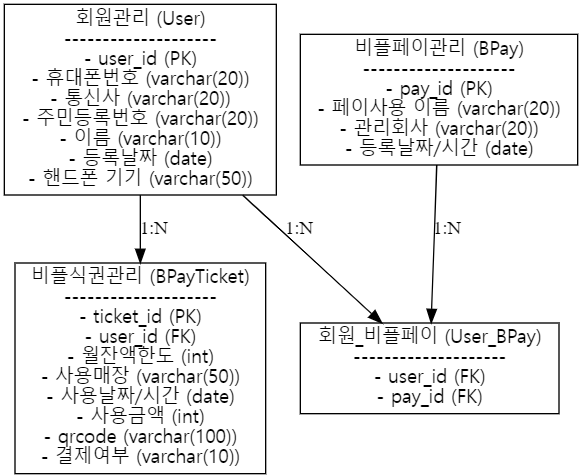

- 주요 테이블 및 관계
    1. 회원관리(User)
        - user_id (PK)
        - 1:N 관계 → 한 명의 회원이 여러 개의 비플페이 및 비플식권을 가질 수 있음
    2. 비플페이관리(BeplePay)
        - pay_id (PK)
        - 여러 회원이 동일한 비플페이를 사용할 수 있으므로 N:M 관계를 처리하기 위해 중간 테이블(User_BeplePay) 추가.
    3. 비플식권관리(BepleTicket)
        - ticket_id (PK)
        - user_id (FK)로 회원과 연결 (1:N 관계)
        - 사용 내역(잔액, 매장, 결제여부 등) 포함.
    4. 회원_비플페이(User_BeplePay)
        - user_id (FK), pay_id (FK)로 이루어진 중간 테이블 (N:M 관계 해결)